(Remember to add a cover page that includes the title of your contribution, the members of your group, and the name of your major.)

# Visualizing the Impact of Lifestyle on Stroke Risk

## 1. Introduction 

### 1.1 Brief Context of Stroke as a Global Health Issue

Stroke remains a leading cause of death worldwide, with an increasing burden in lower-income countries. The [World Stroke Organization](https://www.world-stroke.org/news-and-blog/news/wso-global-stroke-fact-sheet-2022) reports a 70.0% increase in stroke incidents and a 43.0% increase in stroke-related deaths from 1990 to 2019, emphasizing the urgent need for effective stroke prevention and management strategies.

### 1.2 Problem Statement: Analyzing Lifestyle and Stroke Risk

**Problem Statement:** In this project, we aim to explore the relationship between lifestyle choices and the probability of stroke. Our goal is to visualize how healthy and unhealthy habits, along with other factors, contribute to an individual's risk of experiencing a stroke. This involves analyzing data on various health indicators, such as age, hypertension, heart disease, glucose levels, BMI, and smoking status, to discern patterns that may predict stroke likelihood.

**Objective:** By creating a comprehensive visualization of these relationships, we aim to enhance understanding of stroke risk factors and support the development of targeted prevention strategies.

### 1.3 Questions and Assumptions

- **Questions:**
  1. How do different lifestyle choices impact the risk of stroke?
  2. Which factors are the most significant predictors of stroke?
  3. Can we identify specific patterns or trends among high-risk individuals?
  4. Does age have an impact on strokes? 
  5. Do body mass index and glucose level have an impact on strokes?

- **Assumptions:**
  1. Lifestyle factors such as diet, exercise, and smoking significantly impact stroke risk.
  2. Demographic factors like age and gender also play a crucial role in determining stroke likelihood.
  3. Data visualization can effectively communicate complex relationships between multiple risk factors and stroke probability.

Our approach integrates analysis and visualization techniques to provide insights into how lifestyle choices affect stroke risk. We will use the Stroke Prediction Dataset, ensuring strict adherence to data privacy standards. This project not only aligns with our academic focus in Santé Biotech and Cybersecurity but also addresses a critical healthcare challenge. Through this endeavor, we aim to contribute to the understanding of stroke prevention and the broader discussion on healthcare data analytics and privacy.

### 1.4 Formalization of the Problem

**Problem Type:** Classification, i.e., given the input variables, can we predict the likelihood of a stroke? (Yes/No)

In the current dataset, there are 11 features and one binary target variable (stroke). The features are as follows:

| Field             | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| id                | Unique identifier                                                           |
| gender            | "Male", "Female" or "Other"                                                 |
| age               | Age of the patient                                                          |
| hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married      | "No" or "Yes"                                                               |
| work_type         | "children", "Govt_job", "Never_worked", "Private" or "Self-employed"        |
| Residence_type    | "Rural" or "Urban"                                                          |
| avg_glucose_level | Average glucose level in blood                                              |
| bmi               | Body mass index                                                             |
| smoking_status    | "formerly smoked", "never smoked", "smokes" or "Unknown"*                   |
| stroke            | 1 if the patient had a stroke or 0 if not                                   |

\*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 1.5 Libraries and Tools

In [3]:
%pip install matplotlib
%pip install scikit-learn
%pip install pywaffle
%pip install imblearn
%pip install xgboost
%pip install pandas
%pip install diffprivlib
%pip install seaborn
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Helpers
from sklearn.metrics import (confusion_matrix, classification_report)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Visualization
from pywaffle import Waffle

# Dealing with imbalance dataset
from imblearn.over_sampling import SMOTE

## 2. Data exploration

### 2.1 Loading the data

We start by loading the data into a pandas dataframe.

In [5]:
df = pd.read_csv('./_dataset/healthcare-dataset-stroke-data.csv', sep=',', encoding='utf-8')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We can already see that some of the rows hold some NaN values ... we will have to deal with that later.

### 2.2 Data exploration

Let's now get a closer look at the data we have.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Stats of numerical features
round(df.describe(), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [9]:
# Stats of categorical features
round(df.describe(include=['O']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Next, we'll examine the distribution of BMI values in the dataset, as this feature contains some missing values. This analysis will guide our decision on how to handle these missing values - we can either replace them with the mean or the median of the BMI values.

If the distribution is centered around the mean, we'll use the mean to fill in the missing values. On the other hand, if there are outliers, we'll use the median to avoid introducing bias into the data.

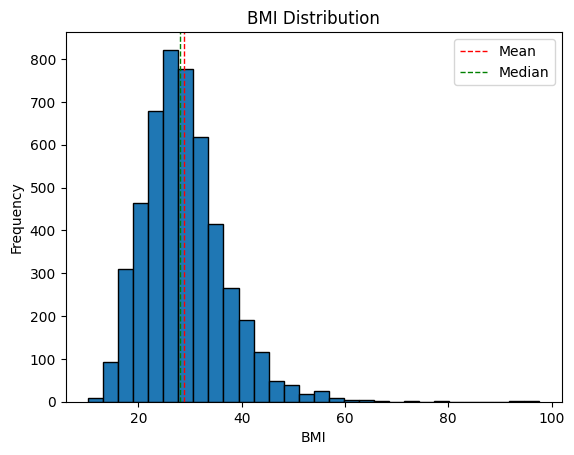

In [10]:
# Create a histogram of the 'bmi' column
plt.hist(df['bmi'].dropna(), bins=30, edgecolor='black')

# Add the mean and median lines
plt.axvline(df['bmi'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['bmi'].median(), color='green', linestyle='dashed', linewidth=1)

# Add a legend
plt.legend({'Mean':df['bmi'].mean(),'Median':df['bmi'].median()})

# Add a title and labels 
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Display the plot
plt.show()

Both the mean and the median are close to each other, so we can use the mean to replace the missing values.

From our analysis, we can draw several conclusions:

- The dataset contains **numerical**, **categorical**, and **binary** data. 
    - The **numerical data** includes `age`, `avg_glucose_level`, and `bmi`.
    - The **categorical data** includes `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status`.
    - The **binary data** includes `hypertension`, `heart_disease`, and `stroke`.

- We should focus on the **categorical data** as it will be the most interesting to visualize.

- The `stroke` column, which is binary (0 or 1), is our **target variable**.

- `BMI` (Body Mass Index) is a numerical value with some missing data. Instead of dropping the rows with missing data, we should fill them with the **mean value** of the column, as both the mean and the median are close to each other. 

- `BMI` can be traced back to someone's personal information if correlated with other data. To address this, we'll implement the model with a **continuous BMI**, and then with a **discretized BMI** to see if it drastically changes the results.

## 2.3 Filling missing values

We will now fill the missing values in the `bmi` column with the mean value of the column.

In [11]:
# Use a simple imputer to fill in the missing values with the median value of the dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 3. Data analysis and visualization : solutions and arguments for the choice of the two algorithms

The purpose of this section is to know which variable is most likely the one to influence the question "Which parameters influence the most on having a stroke ?" 

For this, we're going to do some visualization !

### 3.1 Distribution of target variable : Healthy vs Stroke 

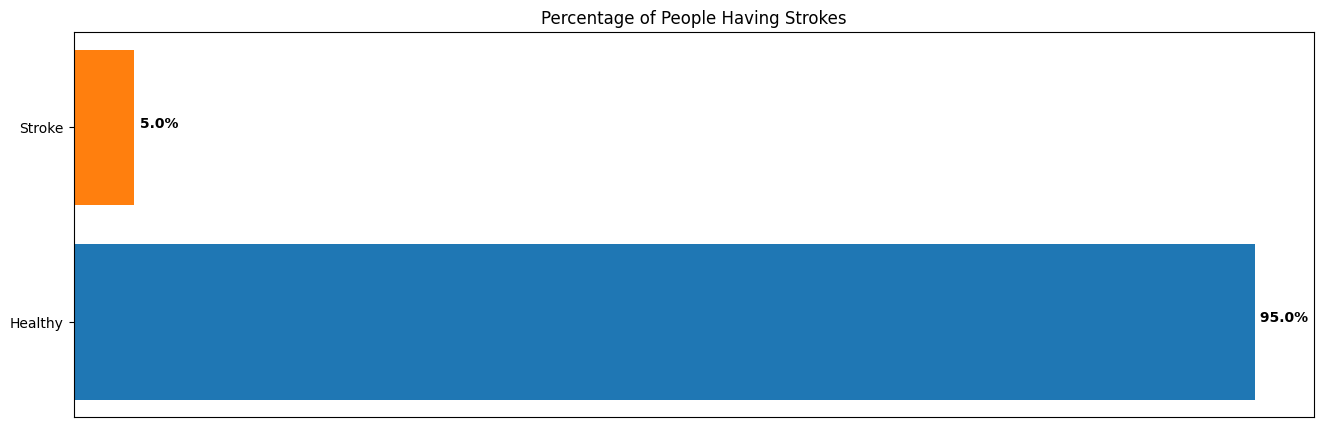

In [12]:
# Count the number of occurrences of each unique value in the 'stroke' column
x = df['stroke'].value_counts()

# Calculate the proportion of stroke cases in the dataset
stroke_proportion = round(x[1]/x[0], 2)*100

# Create a bar plot
fig, ax = plt.subplots()

# Plot the counts
ax.barh(x.index, x.values, color=['#1f77b4', '#ff7f0e'])

# Label the y-axis with the unique values in the 'stroke' column
ax.set_yticks(x.index)
ax.set_yticklabels(['Healthy', 'Stroke'])

# Show the percentage above the bars
for i, v in enumerate(x.values):
    if i == 1:  # If the current bar corresponds to stroke cases
        ax.text(v + 3, i, f" {stroke_proportion}%", color='black', fontweight='bold')
    else:  # If the current bar corresponds to healthy cases
        ax.text(v + 3, i, f" {100 - stroke_proportion}%", color='black', fontweight='bold')

# Hide the x-axis
ax.get_xaxis().set_visible(False)

# Set the title
ax.set_title('Percentage of People Having Strokes')

# Increase the size to fit the text
fig.set_size_inches(16, 5)

# Show the plot
plt.show()

We can see about that 5 patient over 1000 has stroke. This is a heavy **umbalanced** in the dataset, that we'll have to take into consideration when we'll train our model.


### 3.2 Relation between strokes and age

In this section, we are going to look the relationship between strokes and age. To do this, we are going to look at the age group that has had the most strokes. Then we'll create labels with an age range chosen by ourselves, so that we can see which age group is most likely to have a stroke. 

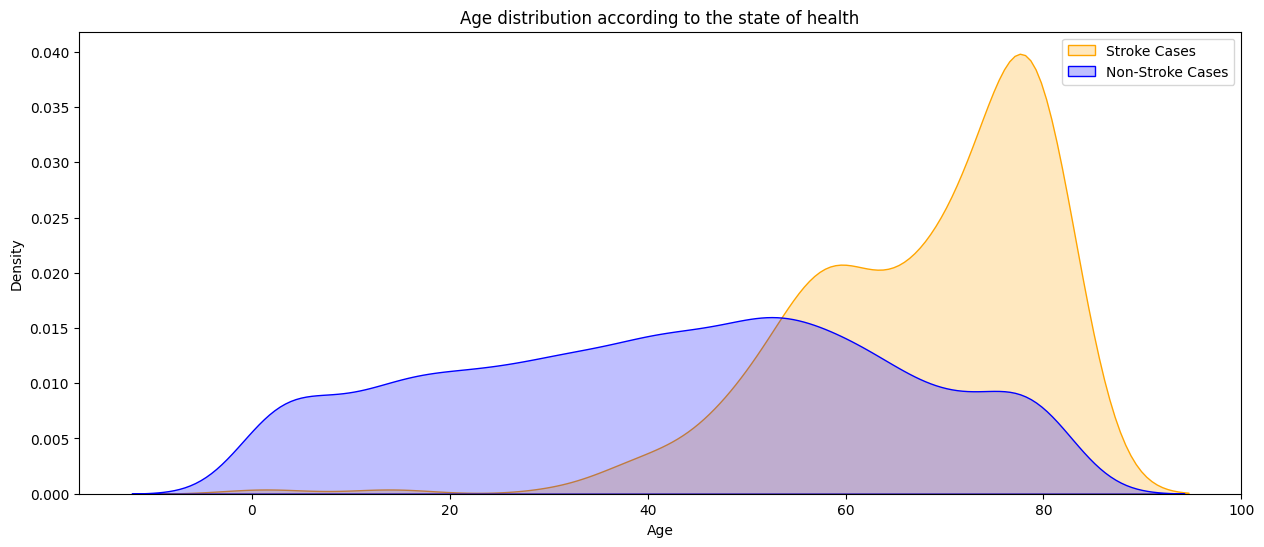

In [43]:
# Let's create a graph to see which ages are most concern about strokes.
plt.figure(figsize=(15, 6))

sns.kdeplot(df[df['stroke'] == 1]['age'], color="orange", fill=True, label='Stroke Cases')
sns.kdeplot(df[df['stroke'] == 0]['age'], color="blue", fill=True, label='Non-Stroke Cases')

plt.title('Age distribution according to the state of health')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

The graph above shows a significant peak in the number of strokes among the elderly, with the highest numbers in the 60/80 age group.

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_14732\2917770852.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke = df.groupby(['age_bin', 'stroke']).size().unstack(fill_value=0)


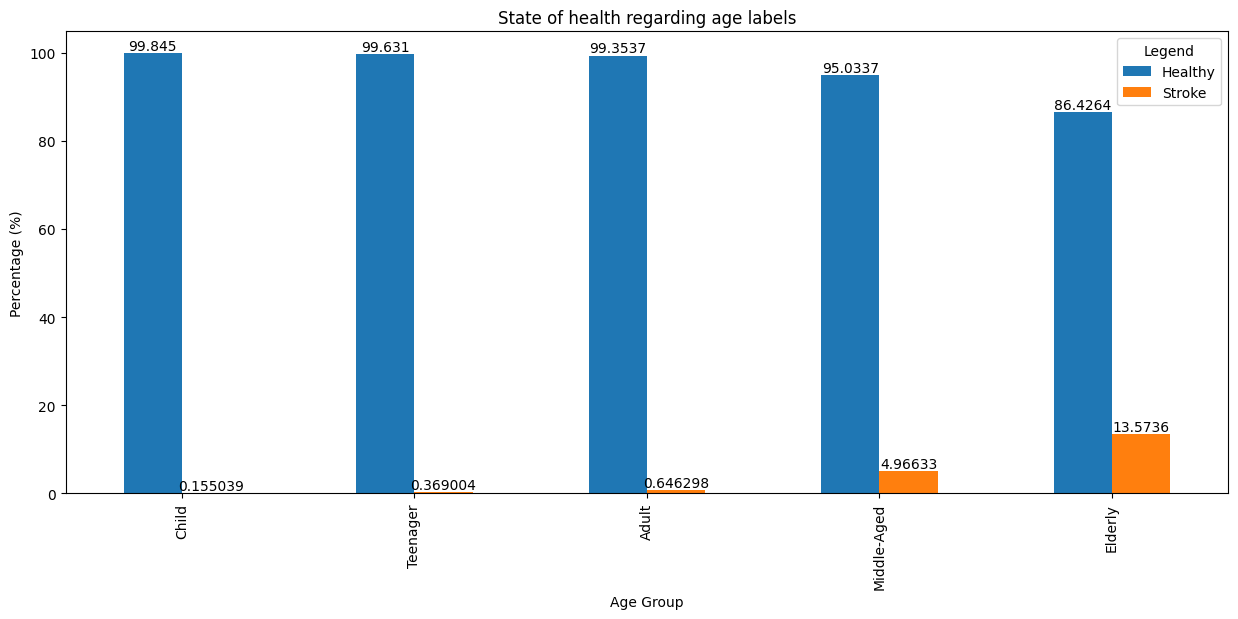

In [59]:
# Let's create labels in order to look which category is the most concern about strokes.
df['age_bin'] = pd.cut(df['age'], bins=[0, 13, 18, 45, 60, 1000], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Elderly'])

age_stroke = df.groupby(['age_bin', 'stroke']).size().unstack(fill_value=0)

age_stroke_percent = age_stroke.div(age_stroke.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15, 6))
age_stroke_percent.plot(kind='bar', ax=ax)

plt.title('State of health regarding age labels')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Legend', labels=['Healthy', 'Stroke'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In this graph, "Child", "Teenager" and "Adult" categories show only a small percentage of stroke cases, with a maximum rate of 0.6% for all 3 combined. In the "Middle-Aged" category, there were 5% of stroke cases and almost 2.7 times higher in the "Eldery" category. 

This clearly shows that age is an important feature to understand the apparition of stroke. Stroke tends to appear in older people, particularly in the "middle-aged" and "eldery" categories.

### 3.3 Relation between strokes and glucose

In this section, we are going to be focus on the feature glucose. We are going to look the relationship between strokes and glucose. To do this, we are going to look at the average blood glucose level according to the state of health. Then we'll create labels with the average glucose level chosen by ourselves, so that we can see the average level of glucose is most likely to have a stroke. 

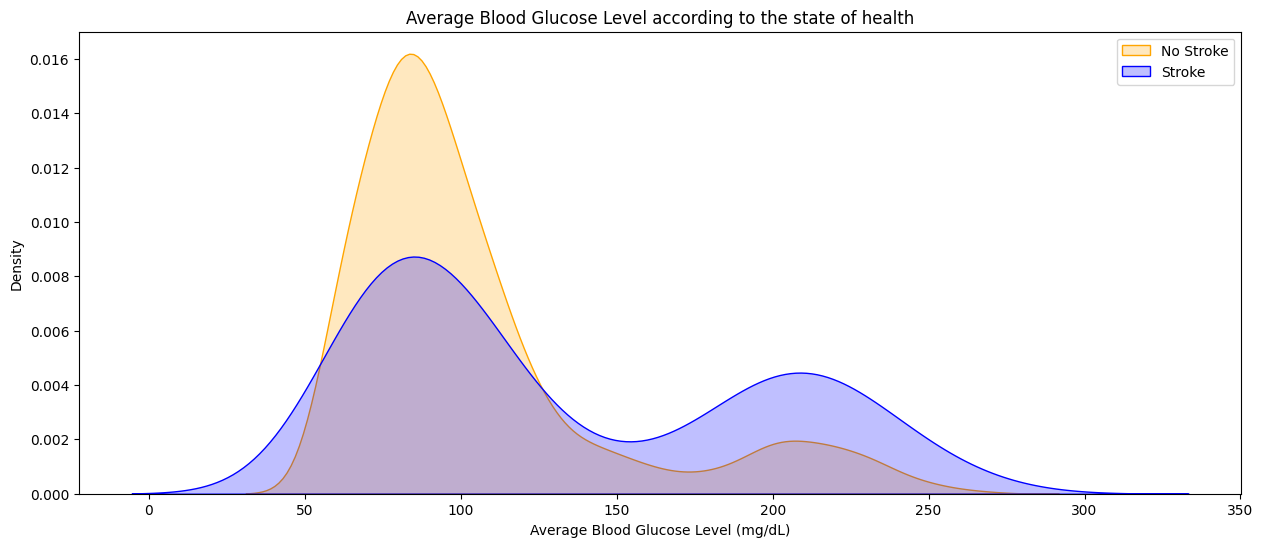

In [54]:
# Let's create a graph to see the average blood glucose level according to the state of health.
plt.figure(figsize=(15, 6))

sns.kdeplot(df[df['stroke'] == 0]['avg_glucose_level'],color="orange", fill=True, label='No Stroke')
sns.kdeplot(df[df['stroke'] == 1]['avg_glucose_level'], color="blue", fill=True, label='Stroke')

plt.title('Average Blood Glucose Level according to the state of health')
plt.xlabel('Average Blood Glucose Level (mg/dL)')
plt.ylabel('Density')
plt.legend()
plt.show()

In the graph above, we can't really distinguish a range of blood glucose levels according to the state of health. Indeed, the two curves follow the same trends.

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_14732\1908260820.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_stroke = df.groupby(['avg_glucose_level_bin', 'stroke']).size().unstack(fill_value=0)


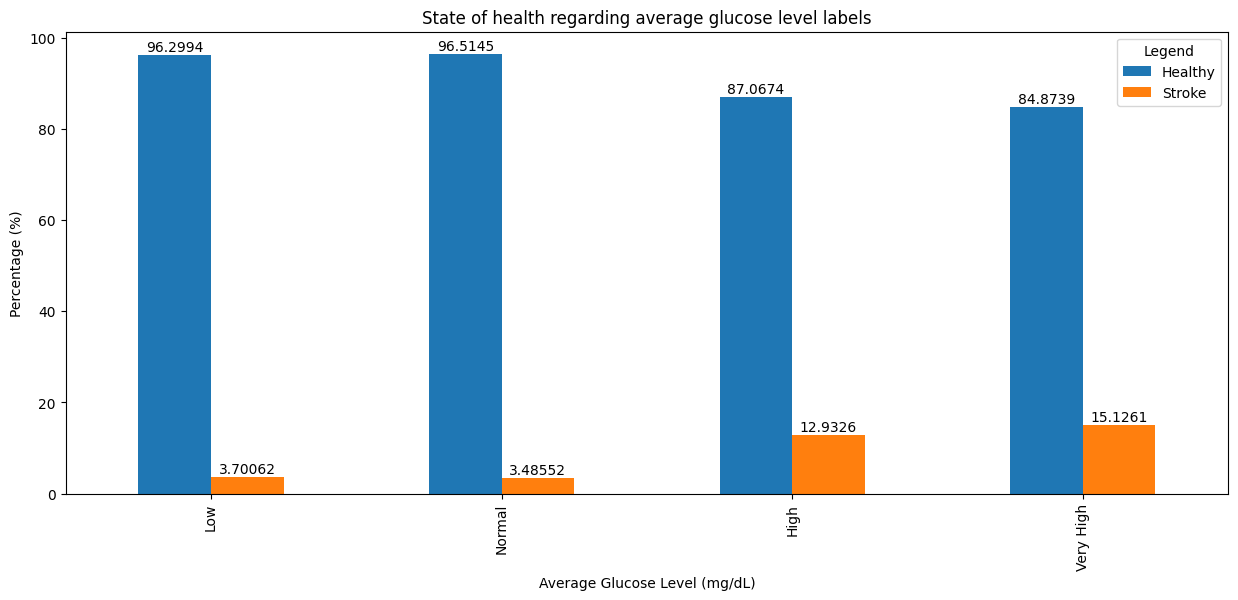

In [69]:
# Let's create labels in order to look which category is the most concern about strokes.
df['avg_glucose_level'] = pd.to_numeric(df['avg_glucose_level'], errors='coerce') # We need to convert into numeric in order to plot
df['avg_glucose_level_bin'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High'])


glucose_stroke = df.groupby(['avg_glucose_level_bin', 'stroke']).size().unstack(fill_value=0)
glucose_stroke_percent= glucose_stroke.div(glucose_stroke.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15, 6))
glucose_stroke_percent.plot(kind='bar', ax=ax)

plt.title('State of health regarding average glucose level labels')
plt.xlabel('Average Glucose Level (mg/dL)')
plt.ylabel('Percentage (%)')
plt.legend(title='Legend', labels=['Healthy', 'Stroke'])

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In the graph above, we can see a small trend in the "High" and "Very High" categories of high blood glucose levels in people who have had a stroke. 

In conclusion, we can see that people who have had a stroke have unusual average blood glucose levels with a tendance of being too high, even if this is not significant. The glucose feature cannot therefore be considered as a major factor.

### 3.4 Relation between strokes and hypertension

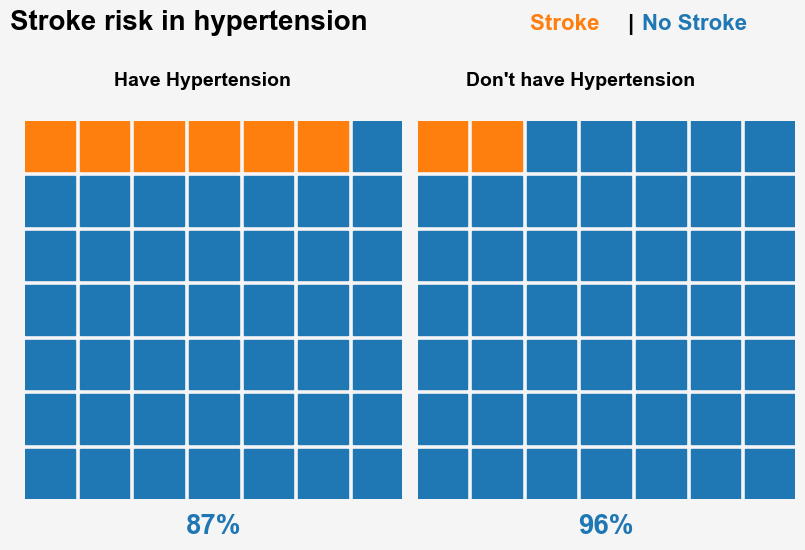

In [16]:
# Calculate the percentage of stroke and healthy patients with and without hypertension
stroke_hyper = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = df[df['stroke'] == 0]['hypertension'].value_counts()

no_hypertension = df['hypertension'].value_counts().values[0]
yes_hypertension = df['hypertension'].value_counts().values[1]

stroke_no = int(round(stroke_hyper.values[0] / no_hypertension * 100, 0))
stroke_yes = int(round(stroke_hyper.values[1] / yes_hypertension * 100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no_hypertension * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes_hypertension * 100, 0))

# Define common plot parameters
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#1f77b4', '#ff7f0e'],
    'vertical': True,
    'interval_ratio_x': 0.1,
    'interval_ratio_y': 0.1,
    'plot_anchor': 'C',
    'alpha': 0.1,
    'starting_location': 'SE'
}

# Create the figure with two subplots
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(8, 8),
                 facecolor='#f6f5f5',
                 dpi=100,
                 tight=True,
                 plots={
                     121: {**common_params, 'values': [healthy_yes, stroke_yes]},
                     122: {**common_params, 'values': [healthy_no, stroke_no]}
                 })

# Add text to the figure
text_params = {'font': 'Arial', 'weight': 'bold', 'style': 'normal'}
fig.text(0., 0.85, 'Stroke risk in hypertension', {**text_params, 'size': 20, 'color': 'black'})
fig.text(0.65, 0.85, 'Stroke ', {**text_params, 'size': 16, 'color': '#ff7f0e'})
fig.text(0.77, 0.85, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(0.79, 0.85, 'No Stroke', {**text_params, 'size': 16, 'color': '#1f77b4'})
fig.text(0.13, 0.78, 'Have Hypertension', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.57, 0.78, "Don't have Hypertension", {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.22, 0.22, '{}%'.format(healthy_yes), {**text_params, 'size': 20, 'color': '#1f77b4'})
fig.text(0.71, 0.22, '{}%'.format(healthy_no), {**text_params, 'size': 20, 'color': '#1f77b4'})

# Display the figure
plt.show()

We can notice that having hypertension increase the risks of having a stroke.

### 3.5 Gender and Hypertension

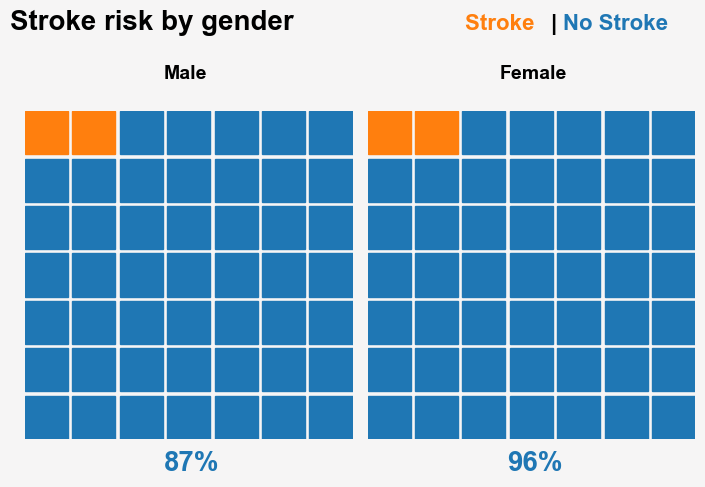

In [17]:
# Calculate the percentage of stroke and healthy patients by gender
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male = df['gender'].value_counts().values[1]

stroke_female = int(round(stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round(stroke_gen.values[1] / male * 100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male * 100, 0))

# Define common plot parameters
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#1f77b4', '#ff7f0e'],
    'vertical': True,
    'interval_ratio_x': 0.1,
    'interval_ratio_y': 0.1,
    'plot_anchor': 'C',
    'alpha': 0.1,
    'starting_location': 'SE'
}

# Create the figure with two subplots
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 plots={
                     121: {**common_params, 'values': [healthy_male, stroke_male]},
                     122: {**common_params, 'values': [healthy_female, stroke_female]}
                 })

# Add text to the figure
text_params = {'font': 'Arial', 'weight': 'bold', 'style': 'normal'}
fig.text(0., 0.85, 'Stroke risk by gender', {**text_params, 'size': 20, 'color': 'black'})
fig.text(0.65, 0.85, 'Stroke ', {**text_params, 'size': 16, 'color': '#ff7f0e'})
fig.text(0.77, 0.85, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(0.79, 0.85, 'No Stroke', {**text_params, 'size': 16, 'color': '#1f77b4'})
fig.text(0.22, 0.78, 'Male', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.70, 0.78, 'Female', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.22, 0.22, '{}%'.format(healthy_yes), {**text_params, 'size': 20, 'color': '#1f77b4'})
fig.text(0.71, 0.22, '{}%'.format(healthy_no), {**text_params, 'size': 20, 'color': '#1f77b4'})

# Display the figure
plt.show() 

There doesn't seems to be any differences regarding of the gender.

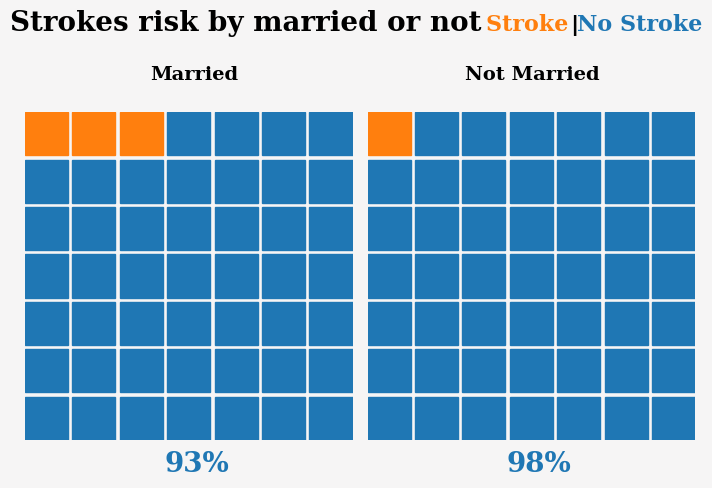

In [18]:
# Calculate the percentage of stroke and healthy patients by marital status
stroke_married = df[df['stroke'] == 1]['ever_married'].value_counts()
healthy_married = df[df['stroke'] == 0]['ever_married'].value_counts()

married = df['ever_married'].value_counts().values[0]
not_married = df['ever_married'].value_counts().values[1]

stroke_yes = int(round(stroke_married.values[0] / married * 100, 0))
stroke_no = int(round(stroke_married.values[1] / not_married * 100, 0))
healthy_yes = int(round(healthy_married.values[0] / married * 100, 0))
healthy_no = int(round(healthy_married.values[1] / not_married * 100, 0))

# Define common plot parameters
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#1f77b4', '#ff7f0e'],
    'vertical': True,
    'interval_ratio_x': 0.1,
    'interval_ratio_y': 0.1,
    'plot_anchor': 'C',
    'alpha': 0.1,
    'starting_location': 'SE'
}

# Create the figure with two subplots
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 plots={
                     121: {**common_params, 'values': [healthy_yes, stroke_yes]},
                     122: {**common_params, 'values': [healthy_no, stroke_no]}
                 })

# Add text to the figure
text_params = {'font': 'Serif', 'weight': 'bold', 'style': 'normal'}
fig.text(0., 0.85, 'Strokes risk by married or not', {**text_params, 'size': 20, 'color': 'black'})
fig.text(0.68, 0.85, 'Stroke ', {**text_params, 'size': 16, 'color': '#ff7f0e'})
fig.text(0.80, 0.85, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(0.81, 0.85, 'No Stroke', {**text_params, 'size': 16, 'color': '#1f77b4'})
fig.text(0.20, 0.78, 'Married', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.65, 0.78, 'Not Married', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.22, 0.22, '{}%'.format(healthy_yes), {**text_params, 'size': 20, 'color': '#1f77b4'})
fig.text(0.71, 0.22, '{}%'.format(healthy_no), {**text_params, 'size': 20, 'color': '#1f77b4'})

# Display the figure
plt.show()


This was initially done as an inside joke. Well... don't marry ?'t

### 3.7 Does living in the campaign matters ?

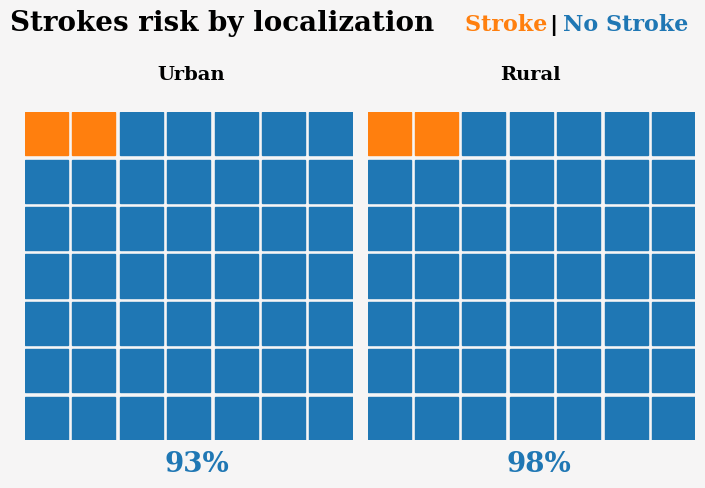

In [19]:
# Calculate the percentage of stroke and healthy patients by residence
stroke_residence = df[df['stroke'] == 1]['Residence_type'].value_counts()
healthy_residence = df[df['stroke'] == 0]['Residence_type'].value_counts()

urban = df['Residence_type'].value_counts().values[0]
rural = df['Residence_type'].value_counts().values[1]

stroke_urban = int(round(stroke_residence.values[0] / urban * 100, 0))
stroke_rural = int(round(stroke_residence.values[1] / rural * 100, 0))
healthy_urban = int(round(healthy_residence.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_residence.values[1] / rural * 100, 0))

# Define common plot parameters
common_params = {
    'rows': 7,
    'columns': 7,
    'colors': ['#1f77b4', '#ff7f0e'],
    'vertical': True,
    'interval_ratio_x': 0.1,
    'interval_ratio_y': 0.1,
    'plot_anchor': 'C',
    'alpha': 0.1,
    'starting_location': 'SE'
}

# Create the figure with two subplots
fig = plt.figure(FigureClass=Waffle, 
                 constrained_layout=True,
                 figsize=(7, 7),
                 facecolor='#f6f5f5',
                 dpi=100,
                 plots={
                     121: {**common_params, 'values': [healthy_urban, stroke_urban]},
                     122: {**common_params, 'values': [healthy_rural, stroke_rural]}
                 })

# Add text to the figure
text_params = {'font': 'Serif', 'weight': 'bold', 'style': 'normal'}
fig.text(0., 0.85, 'Strokes risk by localization', {**text_params, 'size': 20, 'color': 'black'})
fig.text(0.65, 0.85, 'Stroke ', {**text_params, 'size': 16, 'color': '#ff7f0e'})
fig.text(0.77, 0.85, '|', {'color': 'black', 'size': '16', 'weight': 'bold'})
fig.text(0.79, 0.85, 'No Stroke', {**text_params, 'size': 16, 'color': '#1f77b4'})
fig.text(0.21, 0.78, 'Urban', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.70, 0.78, 'Rural', {**text_params, 'size': 14, 'color': 'black'})
fig.text(0.22, 0.22, '{}%'.format(healthy_yes), {**text_params, 'size': 20, 'color': '#1f77b4'})
fig.text(0.71, 0.22, '{}%'.format(healthy_no), {**text_params, 'size': 20, 'color': '#1f77b4'})
# Display the figure
plt.show()

There doesn't seems to be any differences regarding where the patient lives.

## 3.6 Relation between stroke and weight (BMI)

In this section, we are going to be focus on the feature weight (BMI). We are going to look the relationship between strokes and BMI. To do this, we are going to look at the weight according to the state of health. Then we'll create labels with the weight chosen by ourselves, so that we can see the weight is most likely to have a stroke. 

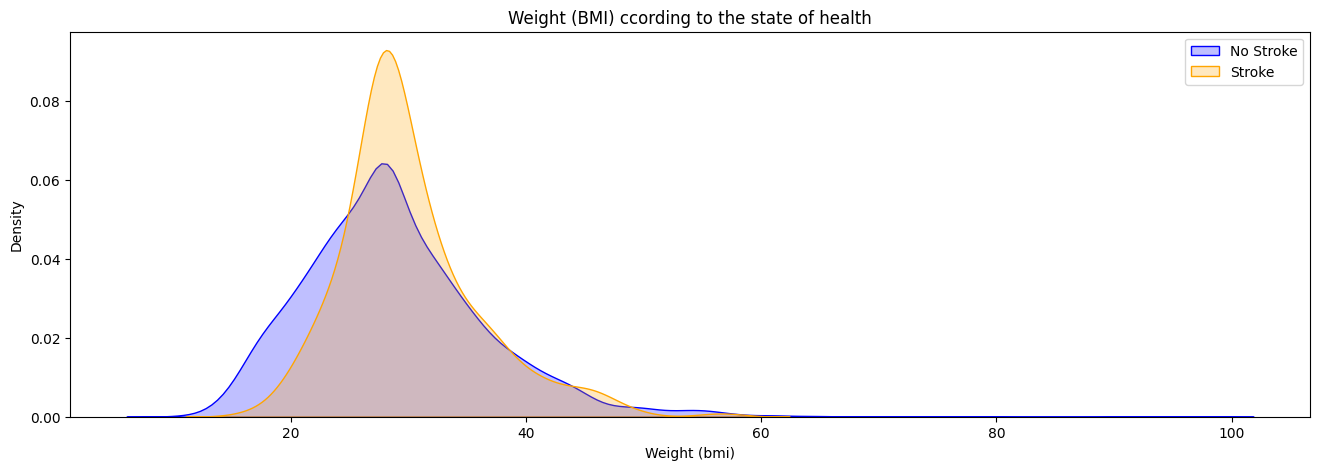

In [63]:
# Let's create a graph to see the weight  according to the state of health.
plt.figure(figsize=(16, 5))

sns.kdeplot(df[df['stroke'] == 0]['bmi'], fill=True, color='blue', label='No Stroke')
sns.kdeplot(df[df['stroke'] == 1]['bmi'], fill=True, color='orange', label='Stroke')

plt.title('Weight (BMI) ccording to the state of health')
plt.xlabel('Weight (bmi)')
plt.ylabel('Density')
plt.legend()
plt.show()

In the graph above, we can see that the BMI is significant around the 25-30 bracket, corresponding to "Overweight" for people who have had a stroke.

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_14732\3366687859.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  BMI_stroke = df.groupby(['bmi_bin', 'stroke']).size().unstack(fill_value=0)


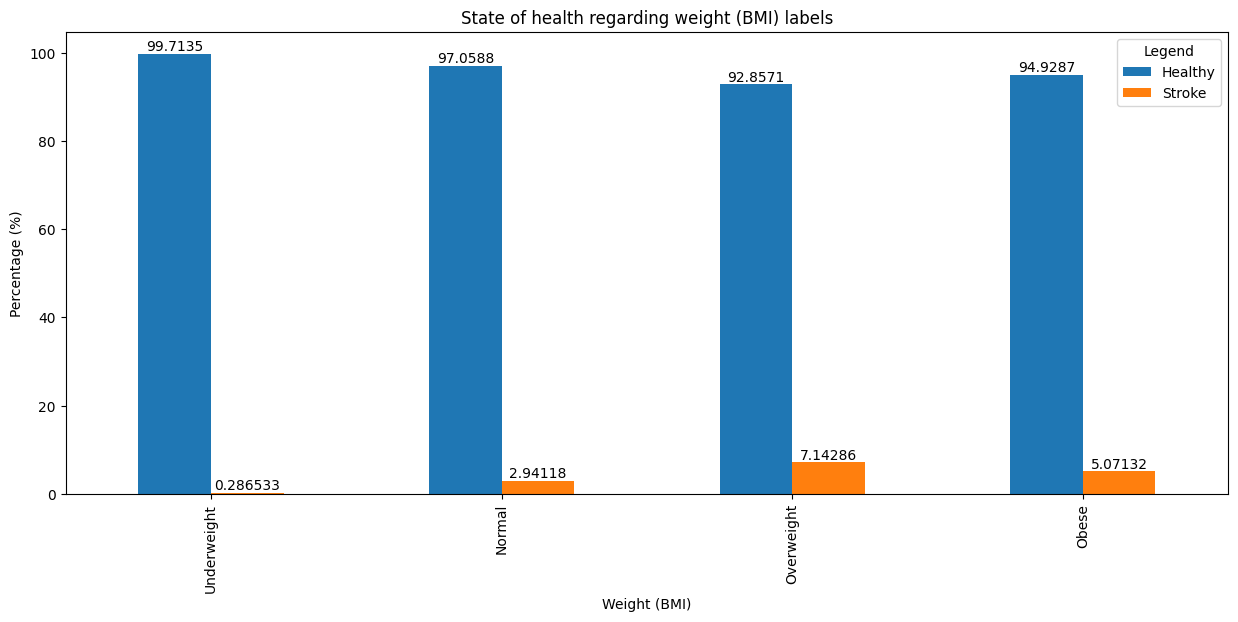

In [68]:
# Let's create labels in order to look which category is the most concern about strokes.
df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 1000], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

BMI_stroke = df.groupby(['bmi_bin', 'stroke']).size().unstack(fill_value=0)
BMI_stroke_percent = BMI_stroke.div(BMI_stroke.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15, 6))
BMI_stroke_percent.plot(kind='bar', ax=ax)

plt.title('State of health regarding weight (BMI) labels')
plt.xlabel('Weight (BMI)')
plt.ylabel('Percentage (%)')
plt.legend(title='Legend', labels=['Healthy', 'Stroke'])

for container in ax.containers:
    ax.bar_label(container)
plt.show()

In the graph above, the "Overweight" and "Obese" categories are those most at risk of having a stroke. 

In conclusion, the "BMI" feature is important in determining the appearance of a stroke.

## 4. Predictive model : implementing the two algorithms

The two algorithms we chose to implement are the **Random Forest Classifier** and **XGBoost**. 

Like stated in the previous section, we are dealing with a *health* and *cybersecurity* problem which require explainability, thus **Random Forest Classifier** is a good choice. However, we also want to have a good accuracy, and **XGBoost** is known to be a good algorithm for that.

Let's first implement the **Random Forest Classifier** using SMOTE resampling to deal with the umbalanced dataset. (that we saw in the previous section...)

In [22]:
def test_model_rfc(test_df):
    X = test_df.drop(['stroke'], axis=1)
    y = test_df['stroke']
    
    # Encode categorical variables
    X = pd.get_dummies(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Resample the training set using SMOTE 
    X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
    
    # Define the Random Forest model
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model to the resampled training set
    rfc.fit(X_resampled, y_resampled)
    
    # Predict on the test set
    y_pred = rfc.predict(X_test)
    
    # Predict on the test set
    y_pred = rfc.predict(X_test)
    
    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    # Print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    
def test_model_xgb(test_df):
    X = test_df.drop(['stroke'], axis=1)
    y = test_df['stroke']
    
    # Encode categorical variables
    X = pd.get_dummies(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Resample the training set using SMOTE 
    X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
    
    # Define the XGBoost model
    xgb = XGBClassifier(random_state=42)
    
    # Fit the model to the resampled training set
    xgb.fit(X_resampled, y_resampled)
    
    # Predict on the test set
    y_pred = xgb.predict(X_test)
    
    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    # Print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    

### 4.1 Random Forest Classifier


In [23]:
test_model_rfc(df)

c:\Users\Rebecca\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Rebecca\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Confusion Matrix:
[[957   3]
 [ 61   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.25      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



### 4.2 XGBoost

In [24]:
test_model_xgb(df)

Confusion Matrix:
[[949  11]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.27      0.06      0.10        62

    accuracy                           0.93      1022
   macro avg       0.60      0.53      0.53      1022
weighted avg       0.90      0.93      0.91      1022



### 4.3 Visualizing the models results

<Figure size 6000x6000 with 0 Axes>

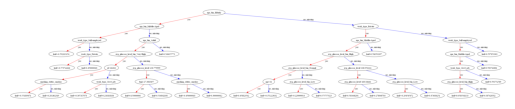

Confusion Matrix:
[[949  11]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.27      0.06      0.10        62

    accuracy                           0.93      1022
   macro avg       0.60      0.53      0.53      1022
weighted avg       0.90      0.93      0.91      1022



In [25]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

test_df = df.copy()

X = test_df.drop(['stroke'], axis=1)
y = test_df['stroke']

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training set using SMOTE 
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Define the XGBoost model
xgb = XGBClassifier(random_state=42)

# Fit the model to the resampled training set
xgb.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = xgb.predict(X_test)

# Create a new figure
plt.figure(figsize=(20, 20), dpi=300)

plot_tree(xgb, num_trees=0)
plt.show()

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

The Random Forest Classifier appears to be the most suitable model for our problem, given its superior accuracy and recall. Accuracy is a measure of how often the model correctly predicts the outcome, while recall is a measure of the model's ability to find all the relevant cases within a dataset. These two metrics are crucial in evaluating the performance of a model, especially in cases where the cost of a false negative is high.

However, it's worth noting that the XGBoost model outperforms the Random Forest Classifier in terms of the F1-score. The F1-score is the harmonic mean of precision and recall, providing a balance between these two metrics. It is particularly useful in situations where the data has an uneven class distribution, as it seeks a balance between precision (how many selected items are relevant) and recall (how many relevant items are selected).

In conclusion, while the Random Forest Classifier shows promising results in terms of accuracy and recall, the XGBoost model's superior F1-score suggests it might be a better choice in scenarios where both precision and recall are equally important. Therefore, the selection of the model should be based on the specific requirements and constraints of the problem at hand.

## 5. Cybersecurity: Data Privacy and Ethics, Implementing Anonymization Techniques

### 5.1 Data Privacy 

In today's digital world, data privacy is a critical issue. As we increasingly rely on technology to manage our lives, we must ensure that our data is protected from misuse. This is especially important in the healthcare sector, where sensitive information is at risk of being compromised. Both the US and the EU have strict regulations in place to protect patient data. 

In the US, the [Health Insurance Portability and Accountability Act (HIPAA)](https://www.hhs.gov/hipaa/for-professionals/privacy/laws-regulations/index.html) establishes national standards for the protection of health information. In the EU, the [General Data Protection Regulation (GDPR)](https://commission.europa.eu/law/law-topic/data-protection/data-protection-eu_en) sets guidelines for the collection and processing of personal data. These regulations are designed to safeguard patient privacy and prevent unauthorized access to sensitive information. 

### 5.2 Anonymization Techniques

In this project, we will use the Stroke Prediction Dataset, which contains personal data that can be viewed as sensitive. As demonstrated by the study by [Sweeney, L. (2000)](https://privacytools.seas.harvard.edu/sites/projects.iq.harvard.edu/files/privacytools/files/paper1.pdf) on the re-identification of individuals in the U.S. population, it is possible to identify 87.1% of the population based solely on {5-digit ZIP, gender, date of birth}. Therefore, we must take steps to protect the privacy of the individuals in our dataset, as our features can be used to identify them in a similar way.

To do this, we will use the following anonymization techniques:
- **Generalization:** We will replace the age and glucose level values with age ranges and glucose level ranges, respectively. This will reduce the data's granularity, making it more difficult to identify individuals.
- **Hashing:** We will hash the values of `bmi`, `avg_glucose_level`, and `age` to further protect the privacy of the individuals in our dataset. This will ensure that the data cannot be traced back to a specific individual. 
- **Differential Privacy:** We will introduce noise to the dataset following the method of `Differential Privacy`. See the following resources for more information on this technique:
  - https://en.wikipedia.org/wiki/Differential_privacy 
  - https://www.kaggle.com/code/samuelguebo/implementing-privacy-preservation-through-python

One of the biggest drawbacks of privacy is that it can limit the usefulness of the data. There is always a trade-off between privacy and accuracy. In this project, we will use the [Differential Privacy](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf) technique to protect the privacy of the individuals in our dataset while still allowing for meaningful analysis by adjusting the amount of noise $\epsilon$ added to the data. 

We'll compare the accuracy of our results **with and without differential privacy to determine the optimal value of $\epsilon$.**

## 6. Experimentation and discussion of the results

### 6.1 Discretization of sensitive numerical data

Let's try to discretize the `age`, `avg_glucose_level`, and `bmi` columns to see if it changes the results drastically.

For discretization, we will use the basis of medical standards. 
- [Assessing Your Weight](https://www.cdc.gov/healthyweight/assessing/index.html)
- [Blood Sugar Levels: What is Normal, Low or High, Target Ranges & More [w/ Downloadable Chart]](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)
- [Age – Physical Description](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)

The specific ranges used for discretization are as follows:

**Age Ranges:**

| Age | Value |
|-----|-------|
| 0-13 | Child | 
| 13-18 | Teenager |
| 18-45 | Adult |
| 45-60 | Middle-Aged | 
| 60+ | Elderly |

---

**Glucose Level Ranges:**

| Glucose Level (mg/dL) | Value |
|---------------|-------|
| 0-90 | Low |
| 90-160 | Normal |
| 160-230 | High |
| 230-300 | Very High |

---

**BMI Ranges:**

| BMI | Value |
|-----|-------|
| 0-18.5 | Underweight |
| 18.5-25 | Normal |
| 25-30 | Overweight |
| 30-35 | Obese |




For the following, we won't need the `id` column, as it could possibly be used to identify the patients. So we'll drop it.

In [26]:
df.drop(['id'], axis=1, inplace=True)

In [27]:
# Binning of the numerical features

discr_df = df.copy()

discr_df['age'] = pd.cut(df['age'], bins=[0, 13, 18, 45, 60, 1000], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Elderly'])
discr_df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High'])
discr_df['bmi'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 1000], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

test_model_rfc(discr_df)
test_model_xgb(discr_df)

Confusion Matrix:
[[933  27]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.13      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.89      0.92      0.90      1022

Confusion Matrix:
[[947  13]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.24      0.06      0.10        62

    accuracy                           0.93      1022
   macro avg       0.59      0.53      0.53      1022
weighted avg       0.90      0.93      0.91      1022



In [28]:
discr_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,avg_glucose_level_bin
0,Male,Elderly,0,1,Yes,Private,Urban,High,Obese,formerly smoked,1,Elderly,High
1,Female,Elderly,0,0,Yes,Self-employed,Rural,High,Overweight,never smoked,1,Elderly,High
2,Male,Elderly,0,1,Yes,Private,Rural,Normal,Obese,never smoked,1,Elderly,Normal
3,Female,Middle-Aged,0,0,Yes,Private,Urban,High,Obese,smokes,1,Middle-Aged,High
4,Female,Elderly,1,0,Yes,Self-employed,Rural,High,Normal,never smoked,1,Elderly,High


### 6.2 Hashing

In [29]:
hash_df = df.copy()

hash_df['age'] = [hash(str(x)) for x in hash_df['age']]
hash_df['avg_glucose_level'] = [hash(str(x)) for x in hash_df['avg_glucose_level']]
hash_df['bmi'] = [hash(str(x)) for x in hash_df['bmi']]

test_model_rfc(hash_df)
test_model_xgb(hash_df)

hash_df.head(10)

Confusion Matrix:
[[957   3]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[950  10]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.06      0.11        62

    accuracy                           0.93      1022
   macro avg       0.61      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,avg_glucose_level_bin
0,Male,8449073350491351267,0,1,Yes,Private,Urban,3869211600717311157,-231701702663697826,formerly smoked,1,Elderly,High
1,Female,4908827508745099990,0,0,Yes,Self-employed,Rural,-2699319820324859010,-8982701817017767331,never smoked,1,Elderly,High
2,Male,7095556792046301300,0,1,Yes,Private,Rural,-4109112081712528330,7610589519133001688,never smoked,1,Elderly,Normal
3,Female,6965253861818944683,0,0,Yes,Private,Urban,-1526464110741076272,2518310797368774204,smokes,1,Middle-Aged,High
4,Female,3231863446383228560,1,0,Yes,Self-employed,Rural,-7571180191132911655,-2206287025472495000,never smoked,1,Elderly,High
5,Male,547636145366748756,0,0,Yes,Private,Urban,-8972591140307252193,2832537004622498193,formerly smoked,1,Elderly,High
6,Male,-211228043681773979,1,1,Yes,Private,Rural,-8364691061858377930,890623265504630680,never smoked,1,Elderly,Low
7,Female,2831857200867442963,0,0,No,Private,Urban,268163829405002966,5998948883035259486,never smoked,1,Elderly,Normal
8,Female,-6637783535280223971,0,0,Yes,Private,Rural,1608084195947467049,-8982701817017767331,Unknown,1,Middle-Aged,Low
9,Female,8809961854984702471,0,0,Yes,Private,Urban,7098487472609322170,6556087398889029203,Unknown,1,Elderly,Low


### 6.31 Differential privacy

In [30]:
from diffprivlib.mechanisms import LaplaceTruncated

sensitivity=3
epsilon=0.3

mechanism = LaplaceTruncated(sensitivity=sensitivity, epsilon=epsilon, lower=5, upper=100)

diff_df = df.copy()
diff_df['age'] = [mechanism.randomise(diff_df['age'][i]) for i in range(len(diff_df['age']))]
diff_df['avg_glucose_level'] = [mechanism.randomise(diff_df['avg_glucose_level'][i]) for i in range(len(diff_df['avg_glucose_level']))]
diff_df['bmi'] = [mechanism.randomise(diff_df['bmi'][i]) for i in range(len(diff_df['bmi']))]

test_model_rfc(diff_df)
test_model_xgb(diff_df)

diff_df.head(10)


Confusion Matrix:
[[948  12]
 [ 60   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.14      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.54      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022

Confusion Matrix:
[[946  14]
 [ 60   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.12      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,avg_glucose_level_bin
0,Male,75.654933,0,1,Yes,Private,Urban,100.000000,37.438172,formerly smoked,1,Elderly,High
1,Female,44.561691,0,0,Yes,Self-employed,Rural,100.000000,29.475192,never smoked,1,Elderly,High
2,Male,84.887001,0,1,Yes,Private,Rural,98.308344,67.932920,never smoked,1,Elderly,Normal
3,Female,49.476288,0,0,Yes,Private,Urban,100.000000,41.636725,smokes,1,Middle-Aged,High
4,Female,74.985789,1,0,Yes,Self-employed,Rural,100.000000,49.675252,never smoked,1,Elderly,High
5,Male,84.542387,0,0,Yes,Private,Urban,100.000000,25.538780,formerly smoked,1,Elderly,High
6,Male,89.533532,1,1,Yes,Private,Rural,75.595086,19.910102,never smoked,1,Elderly,Low
7,Female,100.000000,0,0,No,Private,Urban,100.000000,5.000000,never smoked,1,Elderly,Normal
8,Female,5.000000,0,0,Yes,Private,Rural,75.650019,26.104818,Unknown,1,Middle-Aged,Low
9,Female,82.596086,0,0,Yes,Private,Urban,84.070028,13.649958,Unknown,1,Elderly,Low


### 6.4 All techniques combined

In [31]:
from diffprivlib.mechanisms import LaplaceTruncated

sensitivity=3
epsilon=0.3

mechanism = LaplaceTruncated(sensitivity=sensitivity, epsilon=epsilon, lower=5, upper=100)


all_df = df.copy()

all_df['age'] = [mechanism.randomise(all_df['age'][i]) for i in range(len(all_df['age']))]
all_df['age'] = pd.cut(all_df['age'], bins=[0, 13, 18, 45, 60, 1000], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Elderly'])
all_df['age'] = [hash(str(x)) for x in all_df['age']]

all_df['avg_glucose_level'] = [mechanism.randomise(all_df['avg_glucose_level'][i]) for i in range(len(all_df['avg_glucose_level']))]
all_df['avg_glucose_level'] = pd.cut(all_df['avg_glucose_level'], bins=[0, 90, 160, 230, 300], labels=['Low', 'Normal', 'High', 'Very High'])
all_df['avg_glucose_level'] = [hash(str(x)) for x in all_df['avg_glucose_level']]

all_df['bmi'] = [mechanism.randomise(all_df['bmi'][i]) for i in range(len(all_df['bmi']))]
all_df['bmi'] = pd.cut(all_df['bmi'], bins=[0, 18.5, 25, 30, 1000], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
all_df['bmi'] = [hash(str(x)) for x in all_df['bmi']]

test_model_rfc(all_df)
test_model_xgb(all_df)

Confusion Matrix:
[[929  31]
 [ 58   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.11      0.06      0.08        62

    accuracy                           0.91      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.89      0.91      0.90      1022

Confusion Matrix:
[[930  30]
 [ 61   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       960
           1       0.03      0.02      0.02        62

    accuracy                           0.91      1022
   macro avg       0.49      0.49      0.49      1022
weighted avg       0.88      0.91      0.90      1022



The interesting part of this result is that our accuracy is still quite high. Even with 2 approximations (generalization and differential privacy) and a hashing, we don't loose much accuracy.

In a context of medical analyze, 92% are not even close to be acceptable, but the key takeaway here is that there is not much loss in accuracy, with a LOT more privacy.

## 7. Group assessment (what you have learned, points for improvement, etc.)

### 7.1 Data analysis conclusion

In our analysis, we observed that certain variables, such as `bmi`, `age`, and `heart_diseases`, had a significant impact on the model's performance. These variables played a crucial role in predicting the outcome accurately. 

On the contrary, we found that the remaining variables either had minimal importance or were already explained or correlated with the aforementioned key variables. This outcome aligns with our expectations and reinforces the understanding that these three variables are crucial in determining the model's predictive power.

### 7.2 What we have learned

Throughout this analysis, we have delved into various advanced concepts and techniques in data analysis and machine learning. We have explored the application of different models, such as Random Forest and XGBoost, to predict stroke occurrences based on a set of features. Additionally, we have employed anonymization techniques, including generalization, hashing, and differential privacy, to protect the privacy of sensitive data while still allowing for meaningful analysis.

Our findings have revealed that certain variables, such as BMI, age, and heart diseases, play a significant role in accurately predicting stroke outcomes. These variables have demonstrated a strong correlation with the target variable and have proven to be crucial in determining the model's predictive power.

Furthermore, we have observed that the combination of anonymization techniques, such as generalization, hashing, and differential privacy, can effectively protect the privacy of individuals in the dataset without sacrificing a significant amount of accuracy. This highlights the importance of implementing privacy-preserving measures in data analysis, particularly in sensitive domains like healthcare.

In conclusion, this analysis has provided valuable insights into advanced data analysis techniques and their application in real-world scenarios. By leveraging machine learning models and privacy-preserving techniques, we can enhance our understanding of complex datasets while ensuring the protection of sensitive information.

### 7.3 Improvements

In this analysis, there are several areas that could be improved to enhance the predictive power and analytical capabilities. Due to time constraints and other academic commitments, certain aspects were not thoroughly explored. However, by considering new ways to predict and analyze the data, we can further enhance the insights gained from this study.

1. **Feature Engineering**: The current analysis focused on a limited set of features, such as BMI, age, and heart diseases. To improve the predictive accuracy, additional relevant features could be considered. For example, incorporating lifestyle factors, medical history, and genetic information could provide a more comprehensive understanding of the underlying factors contributing to stroke occurrences.

2. **Advanced Machine Learning Techniques**: While Random Forest and XGBoost models were employed in this analysis, other advanced machine learning algorithms could be explored. Techniques such as deep learning, ensemble methods, and support vector machines (SVM) may offer improved predictive performance and uncover complex relationships within the dataset.

3. **Model Optimization**: The current analysis utilized default hyperparameters for the machine learning models. Fine-tuning the model hyperparameters through techniques like grid search or Bayesian optimization could lead to improved model performance. Additionally, exploring different model architectures and ensemble strategies could further enhance the predictive accuracy.

4. **Interpretability and Explainability**: While the current analysis focused on predictive accuracy, incorporating interpretability and explainability techniques could provide valuable insights into the underlying factors contributing to stroke occurrences. Techniques such as feature importance analysis, SHAP values, and model-agnostic interpretability methods can help identify the most influential features and provide explanations for the model's predictions.

5. **Validation and Generalization**: To ensure the robustness and generalizability of the models, rigorous validation techniques such as cross-validation and external validation on independent datasets should be performed. This would provide a more accurate assessment of the model's performance and its ability to generalize to unseen data.

In conclusion, while this analysis provides valuable insights into predicting stroke occurrences, there are several avenues for improvement. By incorporating advanced machine learning techniques, exploring additional features, optimizing model parameters, and ensuring interpretability and generalizability, we can enhance the accuracy and depth of analysis in future studies.